In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sales_df = pd.read_csv('sales.csv')
sales_df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [5]:
sales_df.rename(columns={'Unnamed: 0': 'Index_Data'}, inplace=True)
sales_df.head()

,Index_Data,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [6]:
sales_df.dtypes

Index_Data              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [7]:
sales_df.isnull().sum()

Index_Data             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [8]:
for col in sales_df.columns:
    print(f"Unique values in {col}: {sales_df[col].unique()}")

Unique values in Index_Data: [425390 291687 411278 ... 117952 435829 305711]
Unique values in store_ID: [366 394 807 ... 450  38 989]
Unique values in day_of_week: [4 6 2 7 3 5 1]
Unique values in date: ['2013-04-18' '2015-04-11' '2013-08-29' '2013-05-28' '2013-10-10'
 '2013-03-19' '2014-06-08' '2014-07-16' '2013-05-11' '2013-06-25'
 '2014-10-05' '2014-03-28' '2014-09-27' '2013-05-21' '2013-07-01'
 '2013-12-18' '2015-06-10' '2015-03-28' '2013-01-27' '2015-05-06'
 '2014-06-12' '2014-05-10' '2014-12-27' '2015-02-18' '2014-02-17'
 '2013-09-18' '2013-06-19' '2014-06-30' '2014-06-06' '2015-07-29'
 '2014-05-15' '2014-12-06' '2015-03-09' '2015-05-05' '2014-03-09'
 '2013-10-18' '2015-04-25' '2015-03-04' '2013-08-18' '2015-06-19'
 '2013-10-28' '2014-04-19' '2013-01-15' '2013-10-06' '2015-02-10'
 '2014-01-08' '2014-06-26' '2013-11-13' '2014-04-22' '2013-09-01'
 '2013-11-09' '2014-11-19' '2014-03-07' '2015-03-27' '2015-02-01'
 '2014-12-15' '2013-02-24' '2013-03-17' '2013-04-24' '2015-03-16'
 '201

In [9]:
sales_df.shape

(640840, 10)

In [10]:
for col in sales_df.columns:
    print(f"Unique values in {col}: {sales_df[col].nunique()}")

Unique values in Index_Data: 640840
Unique values in store_ID: 1115
Unique values in day_of_week: 7
Unique values in date: 942
Unique values in nb_customers_on_day: 3886
Unique values in open: 2
Unique values in promotion: 2
Unique values in state_holiday: 4
Unique values in school_holiday: 2
Unique values in sales: 20129


In [11]:
sales_df.describe()

,Index_Data,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [12]:
sales_df[sales_df['sales']==0].head(10).describe()

,Index_Data,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0,10.0
mean,462940.600000,720.800000,7.0,0.0,0.0,0.0,0.0,0.0
std,134578.568689,263.730418,0.0,0.0,0.0,0.0,0.0,0.0
min,231682.000000,273.000000,7.0,0.0,0.0,0.0,0.0,0.0
25%,359972.000000,532.500000,7.0,0.0,0.0,0.0,0.0,0.0
50%,485044.500000,713.000000,7.0,0.0,0.0,0.0,0.0,0.0
75%,579834.250000,912.750000,7.0,0.0,0.0,0.0,0.0,0.0
max,605423.000000,1093.000000,7.0,0.0,0.0,0.0,0.0,0.0


In [13]:
sales_df = sales_df[sales_df['open']!=0]

In [14]:
sales_df['day_of_week'].unique()

array([4, 6, 2, 3, 5, 1, 7])

In [15]:
for col in sales_df.columns:
    print(f"Unique values in {col}: {sales_df[col].unique()}")

Unique values in Index_Data: [425390 291687 411278 ... 152315 117952 435829]
Unique values in store_ID: [366 394 807 ...  36 989 871]
Unique values in day_of_week: [4 6 2 3 5 1 7]
Unique values in date: ['2013-04-18' '2015-04-11' '2013-08-29' '2013-05-28' '2013-10-10'
 '2013-03-19' '2014-07-16' '2013-05-11' '2013-06-25' '2014-03-28'
 '2014-09-27' '2013-05-21' '2013-07-01' '2013-12-18' '2015-06-10'
 '2015-03-28' '2015-05-06' '2014-06-12' '2014-05-10' '2014-12-27'
 '2015-02-18' '2014-02-17' '2013-09-18' '2013-06-19' '2014-06-30'
 '2014-06-06' '2015-07-29' '2014-05-15' '2014-12-06' '2015-03-09'
 '2015-05-05' '2013-10-18' '2015-04-25' '2015-03-04' '2015-06-19'
 '2013-10-28' '2014-04-19' '2013-01-15' '2015-02-10' '2014-01-08'
 '2014-06-26' '2013-11-13' '2014-04-22' '2013-11-09' '2014-11-19'
 '2014-03-07' '2015-03-27' '2014-12-15' '2013-04-24' '2015-03-16'
 '2013-07-31' '2015-05-29' '2013-03-21' '2015-05-21' '2013-01-30'
 '2015-02-23' '2014-04-25' '2013-07-25' '2015-07-01' '2014-06-28'
 '201

In [16]:
sales_df.shape

(532016, 10)

In [17]:
sales_df_transformed = pd.get_dummies(sales_df, columns=["state_holiday", "day_of_week"], prefix=["state_holiday","DoW"], dtype=int,drop_first=True)
# Check the result
sales_df_transformed

,Index_Data,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,DoW_2,DoW_3,DoW_4,DoW_5,DoW_6,DoW_7
0,425390,366,2013-04-18,517,1,0,0,4422,0,0,0,0,0,1,0,0,0
1,291687,394,2015-04-11,694,1,0,0,8297,0,0,0,0,0,0,0,1,0
2,411278,807,2013-08-29,970,1,1,0,9729,0,0,0,0,0,1,0,0,0
3,664714,802,2013-05-28,473,1,1,0,6513,0,0,0,1,0,0,0,0,0
4,540835,726,2013-10-10,1068,1,1,0,10882,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640833,122579,77,2015-01-17,701,1,0,0,8219,0,0,0,0,0,0,0,1,0
640835,359783,409,2013-10-26,483,1,0,0,4553,0,0,0,0,0,0,0,1,0
640836,152315,97,2014-04-14,987,1,1,0,12307,0,0,0,0,0,0,0,0,0
640837,117952,987,2014-07-07,925,1,0,0,6800,0,0,0,0,0,0,0,0,0


In [18]:
sales_df_transformed.dtypes

Index_Data              int64
store_ID                int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
school_holiday          int64
sales                   int64
state_holiday_a         int64
state_holiday_b         int64
state_holiday_c         int64
DoW_2                   int64
DoW_3                   int64
DoW_4                   int64
DoW_5                   int64
DoW_6                   int64
DoW_7                   int64
dtype: object

In [19]:
sales_df_transformed["date"] = pd.to_datetime(sales_df_transformed["date"]).apply(lambda x: x.toordinal())

In [20]:
sales_df_transformed.dtypes

Index_Data             int64
store_ID               int64
date                   int64
nb_customers_on_day    int64
open                   int64
promotion              int64
school_holiday         int64
sales                  int64
state_holiday_a        int64
state_holiday_b        int64
state_holiday_c        int64
DoW_2                  int64
DoW_3                  int64
DoW_4                  int64
DoW_5                  int64
DoW_6                  int64
DoW_7                  int64
dtype: object

In [21]:
sales_df_transformed['sales_per_customer'] = sales_df_transformed['sales']/sales_df_transformed['nb_customers_on_day']
sales_df_transformed.head()

,Index_Data,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,DoW_2,DoW_3,DoW_4,DoW_5,DoW_6,DoW_7,sales_per_customer
0,425390,366,734976,517,1,0,0,4422,0,0,0,0,0,1,0,0,0,8.553191
1,291687,394,735699,694,1,0,0,8297,0,0,0,0,0,0,0,1,0,11.955331
2,411278,807,735109,970,1,1,0,9729,0,0,0,0,0,1,0,0,0,10.029897
3,664714,802,735016,473,1,1,0,6513,0,0,0,1,0,0,0,0,0,13.769556
4,540835,726,735151,1068,1,1,0,10882,0,0,0,0,0,1,0,0,0,10.189139


In [22]:
map_id_expenses = sales_df_transformed.groupby('store_ID')['sales_per_customer'].mean().reset_index()
map_id_expenses.rename(columns={'sales_per_customer': 'sales_per_customer_and_id'}, inplace=True)

In [23]:
map_id_expenses.to_csv('store_ID_vs_sales.csv')

In [24]:
sales_df_transformed_boost = pd.merge(left = sales_df_transformed, right= map_id_expenses, left_on = 'store_ID', right_on = 'store_ID', how='left' )

sales_df_transformed_boost

,Index_Data,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,DoW_2,DoW_3,DoW_4,DoW_5,DoW_6,DoW_7,sales_per_customer,sales_per_customer_and_id
0,425390,366,734976,517,1,0,0,4422,0,0,0,0,0,1,0,0,0,8.553191,10.152320
1,291687,394,735699,694,1,0,0,8297,0,0,0,0,0,0,0,1,0,11.955331,12.556030
2,411278,807,735109,970,1,1,0,9729,0,0,0,0,0,1,0,0,0,10.029897,9.946321
3,664714,802,735016,473,1,1,0,6513,0,0,0,1,0,0,0,0,0,13.769556,12.884072
4,540835,726,735151,1068,1,1,0,10882,0,0,0,0,0,1,0,0,0,10.189139,10.211092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532011,122579,77,735615,701,1,0,0,8219,0,0,0,0,0,0,0,1,0,11.724679,11.368359
532012,359783,409,735167,483,1,0,0,4553,0,0,0,0,0,0,0,1,0,9.426501,10.055520
532013,152315,97,735337,987,1,1,0,12307,0,0,0,0,0,0,0,0,0,12.469098,9.612592
532014,117952,987,735421,925,1,0,0,6800,0,0,0,0,0,0,0,0,0,7.351351,7.790909


In [25]:
for col in sales_df_transformed_boost.columns:
    print(f"Unique values in {col}: {sales_df_transformed_boost[col].unique()}")

Unique values in Index_Data: [425390 291687 411278 ... 152315 117952 435829]
Unique values in store_ID: [366 394 807 ...  36 989 871]
Unique values in date: [734976 735699 735109 735016 735151 734946 735430 734999 735044 735320
 735503 735009 735050 735220 735759 735685 735724 735396 735363 735594
 735647 735281 735129 735038 735414 735390 735808 735368 735573 735666
 735723 735159 735713 735661 735768 735169 735342 734883 735639 735241
 735410 735185 735345 735181 735556 735299 735684 735582 734982 735673
 735080 735747 734948 735739 734898 735652 735348 735074 735780 735412
 735239 735457 735468 734994 735426 735544 735451 735214 734966 735795
 735013 735148 734903 735722 735178 735388 735645 735646 735020 734886
 735580 735654 735174 735612 735134 735649 735283 735198 735330 735324
 734929 735015 734880 735782 735737 735118 735052 735031 735505 735296
 735764 735473 735411 735425 735790 735208 735535 734878 735201 735710
 735279 735529 735484 735120 735384 735141 735692 735062 73567

In [26]:
sales_df_transformed_boost.isnull().sum()

Index_Data                    0
store_ID                      0
date                          0
nb_customers_on_day           0
open                          0
promotion                     0
school_holiday                0
sales                         0
state_holiday_a               0
state_holiday_b               0
state_holiday_c               0
DoW_2                         0
DoW_3                         0
DoW_4                         0
DoW_5                         0
DoW_6                         0
DoW_7                         0
sales_per_customer           30
sales_per_customer_and_id     0
dtype: int64

In [27]:
sales_df_transformed_boost.drop(columns=['sales_per_customer', 'open'], inplace=True)

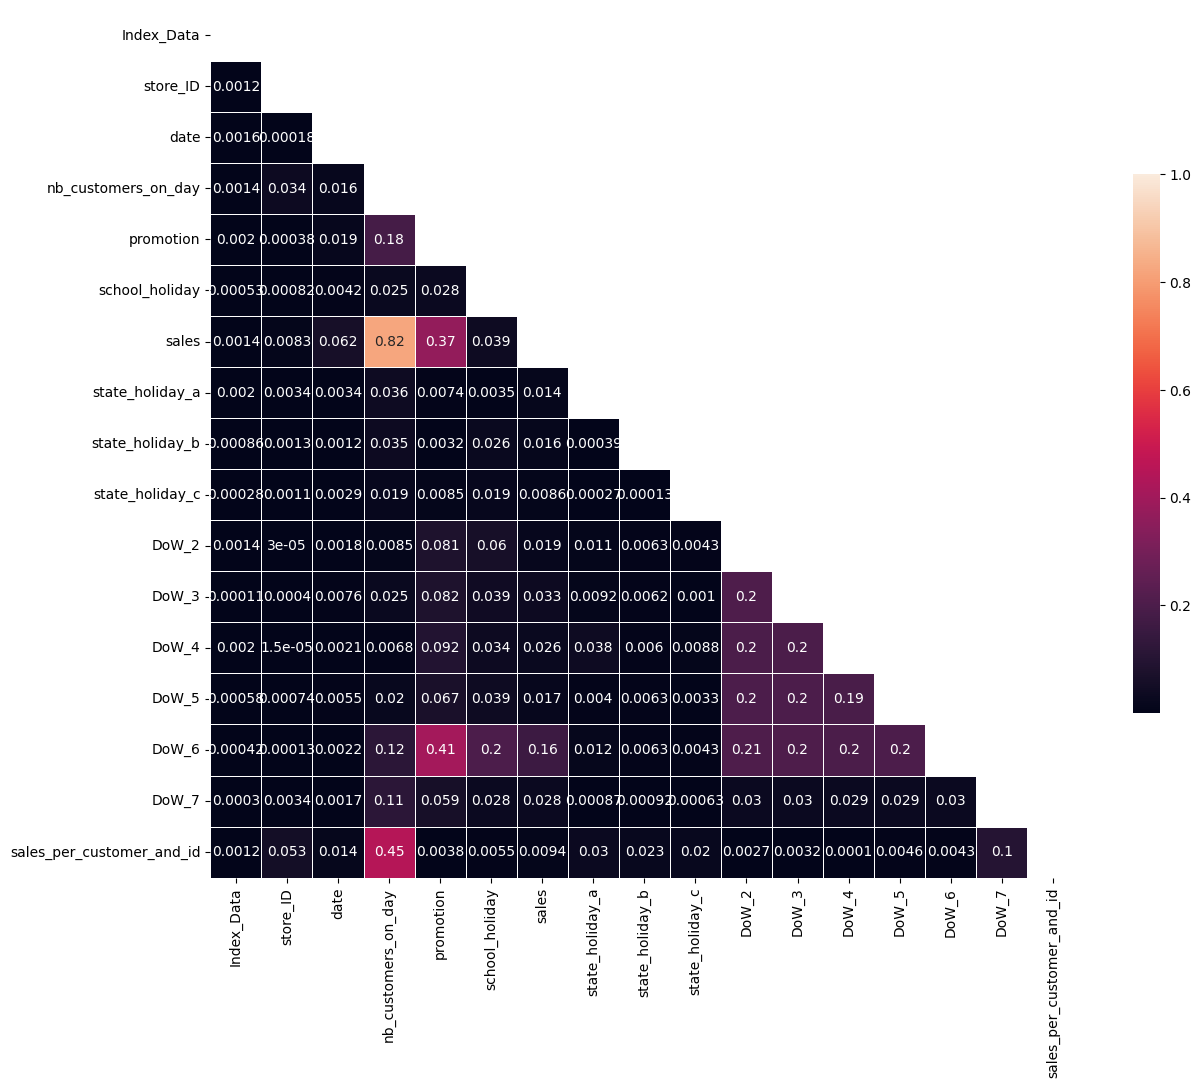

In [28]:
corr=np.abs(sales_df_transformed_boost.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = corr)

plt.show()

In [29]:
sales_df_transformed_boost.isnull().sum()

Index_Data                   0
store_ID                     0
date                         0
nb_customers_on_day          0
promotion                    0
school_holiday               0
sales                        0
state_holiday_a              0
state_holiday_b              0
state_holiday_c              0
DoW_2                        0
DoW_3                        0
DoW_4                        0
DoW_5                        0
DoW_6                        0
DoW_7                        0
sales_per_customer_and_id    0
dtype: int64

In [30]:
X = sales_df_transformed_boost.drop(columns = ['Index_Data', 'store_ID', 'sales']) 
X

,date,nb_customers_on_day,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,DoW_2,DoW_3,DoW_4,DoW_5,DoW_6,DoW_7,sales_per_customer_and_id
0,734976,517,0,0,0,0,0,0,0,1,0,0,0,10.152320
1,735699,694,0,0,0,0,0,0,0,0,0,1,0,12.556030
2,735109,970,1,0,0,0,0,0,0,1,0,0,0,9.946321
3,735016,473,1,0,0,0,0,1,0,0,0,0,0,12.884072
4,735151,1068,1,0,0,0,0,0,0,1,0,0,0,10.211092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532011,735615,701,0,0,0,0,0,0,0,0,0,1,0,11.368359
532012,735167,483,0,0,0,0,0,0,0,0,0,1,0,10.055520
532013,735337,987,1,0,0,0,0,0,0,0,0,0,0,9.612592
532014,735421,925,0,0,0,0,0,0,0,0,0,0,0,7.790909


In [31]:
y = sales_df_transformed_boost['sales']
y

0          4422
1          8297
2          9729
3          6513
4         10882
          ...  
532011     8219
532012     4553
532013    12307
532014     6800
532015     5344
Name: sales, Length: 532016, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y)

In [33]:
X_train

,date,nb_customers_on_day,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,DoW_2,DoW_3,DoW_4,DoW_5,DoW_6,DoW_7,sales_per_customer_and_id
76755,735792,739,1,1,0,0,0,0,0,0,0,0,0,6.856046
377570,735157,342,0,1,0,0,0,0,1,0,0,0,0,8.147874
157669,734966,422,1,0,0,0,0,0,0,0,0,0,0,14.310893
357905,735324,1004,1,0,0,0,0,1,0,0,0,0,0,9.633378
6708,735093,1253,1,1,0,0,0,1,0,0,0,0,0,9.426016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259954,735097,765,0,0,0,0,0,0,0,0,0,1,0,8.320849
148614,735232,975,0,1,0,0,0,0,0,0,0,0,0,9.751375
143493,735401,678,1,0,0,0,0,1,0,0,0,0,0,12.036973
480033,734925,437,0,0,0,0,0,1,0,0,0,0,0,10.624369


In [34]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import pickle
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)
    
with open('standar_scalation.pkl', 'wb') as archivo:
    pickle.dump(scaler_standard, archivo)

scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train) 
X_test_robust = scaler_robust.transform(X_test) 

In [35]:
log_reg = LinearRegression()

In [36]:
log_reg.fit(X_train_standard,y_train)

LinearRegression()

In [37]:
log_reg.score(X_test_standard, y_test)

0.8812114797043513

In [38]:
log_reg.score(X_train_standard, y_train)

0.8818812430893773

In [39]:
log_reg.fit(X_train_robust,y_train)

LinearRegression()

In [40]:
log_reg.score(X_test_robust, y_test)

0.8812114797043514

In [41]:
log_reg.score(X_train_robust, y_train)

0.8818812430893773

In [42]:
import pickle

with open('linear_regression.pkl', 'wb') as archivo:
    pickle.dump(log_reg, archivo)

**Decision tree model**


In [43]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train_standard, y_train)


DecisionTreeRegressor(max_depth=10)

In [44]:
model.score(X_test_standard, y_test)

0.9618742891286576

In [45]:
model.score(X_train_standard, y_train)

0.9634568052808373

In [46]:
#from sklearn.model_selection import cross_validate

#results = cross_validate(model,X_train_standard, y_train, cv = 50)

In [47]:
#results['test_score'].mean()

In [48]:
with open('decision_tree.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)

**Regression with Lasso**

In [49]:
from sklearn.linear_model import Lasso

# Create linear regression
regr = Lasso(alpha=0.1)

# Train the linear regression
model = regr.fit(X_train_standard, y_train)

# Score the model
model.score(X_test_standard, y_test)

0.881210931437316

In [50]:
import xgboost

xgb_reg = xgboost.XGBRegressor(max_depth=6)
xgb_reg.fit(X_train_standard, y_train)
xgb_reg.score(X_test_standard,y_test)

0.9784638285636902

In [51]:
xgb_reg.score(X_train_standard, y_train)

0.979022741317749

In [52]:
with open('XGBRegressor.pkl', 'wb') as archivo:
    pickle.dump(xgb_reg, archivo)

In [53]:
y_pred = xgb_reg.predict(X_test_standard)

In [54]:
pd.DataFrame(y_pred)

,0
0,4301.607910
1,5344.539551
2,5616.801758
3,5908.290039
4,7648.560547
...,...
132999,13063.446289
133000,10026.936523
133001,8137.783691
133002,5753.466797


In [55]:
pd.DataFrame(y_test)

,sales
425696,4205
281220,5185
116085,5844
214187,5862
350650,6898
...,...
372790,12361
225813,11209
462366,8025
178946,5802


**Model usage**

In [56]:
from sklearn.metrics import mean_squared_error

display(mean_squared_error(y_test, y_pred))
display(np.sqrt(mean_squared_error(y_test, y_pred)))

206094.640625

np.float64(453.9764758497955)

In [57]:
abs(y_test-y_pred).mean()

np.float64(314.2956502874906)

In [58]:
with open('decision_tree.pkl', 'rb') as archivo:
    decision_tree = pickle.load(archivo)

with open('linear_regression.pkl', 'rb') as archivo:
    linear_regression = pickle.load(archivo)

with open('XGBRegressor.pkl', 'rb') as archivo:
    xgb_regressor = pickle.load(archivo)

In [59]:
ypred_decision_tree = decision_tree.predict(X_test_standard)
ypred_linear_regression = linear_regression.predict(X_test_standard)
ypred_xgb_regressor = xgb_regressor.predict(X_test_standard)


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = decision_tree.predict(X_test_standard)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 604.0297471132048
MAE: 423.568374413319
R²: 0.9618742891286576


In [65]:
y_pred = linear_regression.predict(X_test_standard)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 3093.1627203696917
MAE: 1453.9585220925064
R²: 0.00021450815522505717


In [69]:
y_pred = xgb_regressor.predict(X_test_standard)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 453.9764758497955
MAE: 314.295654296875
R²: 0.9784638285636902
